# Import Library

In [1]:
import os
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import splitfolders

# Pengambilan Dataset

In [2]:
# base_dir = '\capstone\Dataset'
base_dir = r'MangoLeafBD Dataset'

In [3]:
splitfolders.ratio(
    base_dir,
    output='fixDataset',
    ratio=(.7,0.1, 0.2)
)

Copying files: 4000 files [00:08, 495.40 files/s]


splitfolders.ratio(
    base_dir,
    output='fixDataset',
    ratio=(.7,0.1, 0.2)
)

In [4]:
train_dir = 'fixDataset/train/'
val_dir = 'fixDataset/val/'
val_dir = 'fixDataset/test/'
os.listdir(train_dir)

['Anthracnose',
 'Bacterial Canker',
 'Cutting Weevil',
 'Die Back',
 'Gall Midge',
 'Healthy',
 'Powdery Mildew',
 'Sooty Mould']

# Augmentasi Gambar


In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=0.45,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    brightness_range=(0.5,1.0), 
                    shear_range=0.2, 
                    zoom_range=(0.8,1.0), 
                    fill_mode='nearest', 
                    horizontal_flip=True
                    )
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data train
    target_size=(150,150), # mengubah resolusi seluruh gambar jadi 150*150
    batch_size=32,# untuk menentukan jumlah image yang akan dimasukkan ke dalam steps training
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 2800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [7]:
image, label = train_generator.next()

In [8]:
class_name = os.listdir(train_dir)

In [9]:
class_name

['Anthracnose',
 'Bacterial Canker',
 'Cutting Weevil',
 'Die Back',
 'Gall Midge',
 'Healthy',
 'Powdery Mildew',
 'Sooty Mould']

Ukuran gambar : (32, 150, 150, 3)


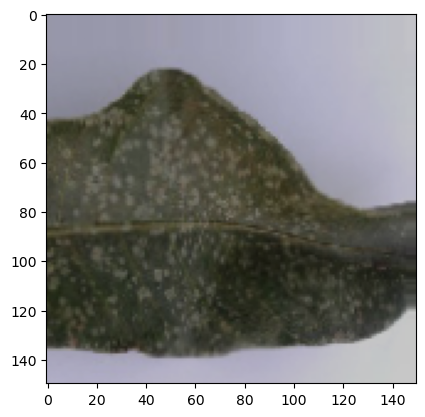

Ukuran gambar : (32, 150, 150, 3)


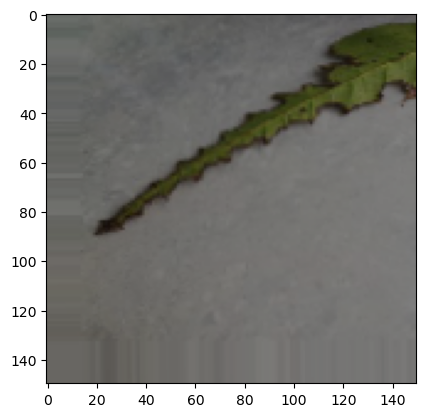

Ukuran gambar : (32, 150, 150, 3)


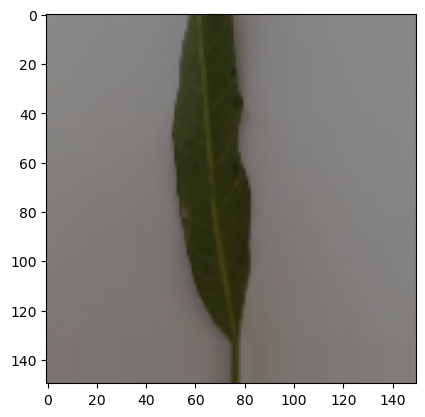

Ukuran gambar : (32, 150, 150, 3)


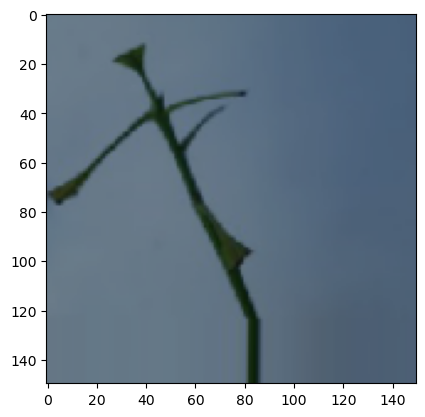

Ukuran gambar : (32, 150, 150, 3)


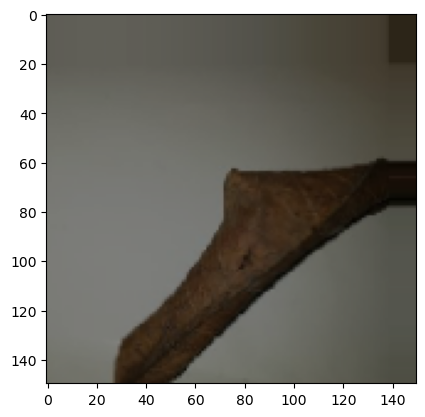

Ukuran gambar : (32, 150, 150, 3)


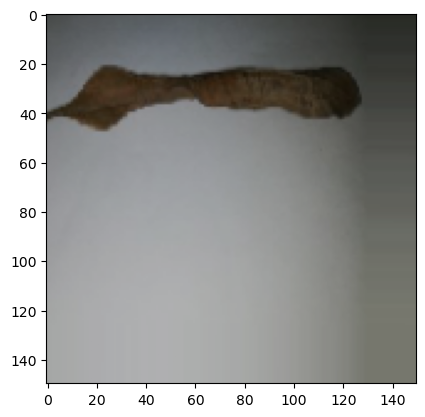

Ukuran gambar : (32, 150, 150, 3)


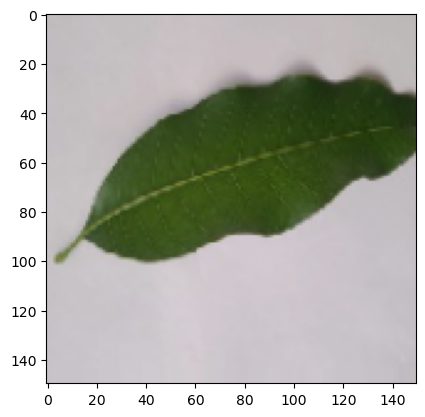

In [10]:
for i in range(7):
  img, label = train_generator.next() # method mengembalikkan data
  print("Ukuran gambar :",img.shape)   #  (32,150,150,3)
  plt.imshow(img[i])
  plt.show()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [12]:
# Inisialisasi model Sequential
model = Sequential()

# Layer konvolusi pertama
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

# Layer konvolusi kedua
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Layer konvolusi ketiga
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Layer flatten untuk mengubah matriks 3D menjadi vektor 1D
model.add(Flatten())

# Dense layer pertama
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer untuk mengurangi overfitting

# Output layer dengan aktivasi softmax untuk klasifikasi multiclass
model.add(Dense(8, activation='softmax'))

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Tampilkan ringkasan arsitektur model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [13]:
from keras.callbacks import EarlyStopping

monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=2)

In [14]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    patience= 2,
    verbose= 1,
    factor=0.3,
    min_lr=0.000001
)

In [15]:
history = model.fit(train_generator,
                    epochs=15,
                    shuffle=True,
                    verbose=True,
                    validation_data=val_generator,
                    callbacks=[reduce_lr,monitor_val_acc])

Epoch 1/15
88/88 [==============================] - 65s 715ms/step - loss: 1.8040 - accuracy: 0.2639 - val_loss: 1.3385 - val_accuracy: 0.4663 - lr: 0.0010
Epoch 2/15
88/88 [==============================] - 62s 701ms/step - loss: 1.2384 - accuracy: 0.5382 - val_loss: 0.9914 - val_accuracy: 0.6363 - lr: 0.0010
Epoch 3/15
88/88 [==============================] - 61s 688ms/step - loss: 0.8695 - accuracy: 0.6729 - val_loss: 0.5535 - val_accuracy: 0.8062 - lr: 0.0010
Epoch 4/15
88/88 [==============================] - 270s 3s/step - loss: 0.7281 - accuracy: 0.7293 - val_loss: 0.4803 - val_accuracy: 0.7937 - lr: 0.0010
Epoch 5/15
88/88 [==============================] - ETA: 0s - loss: 0.6646 - accuracy: 0.7600
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
88/88 [==============================] - 43s 483ms/step - loss: 0.6646 - accuracy: 0.7600 - val_loss: 0.6375 - val_accuracy: 0.7613 - lr: 0.0010


In [16]:
test_loss, test_acc = model.evaluate(test_generator)
print("loss:", test_loss)
print("acc:", test_acc)

25/25 [==============================] - 2s 91ms/step - loss: 0.6375 - accuracy: 0.7613
loss: 0.6375455856323242
acc: 0.7612500190734863


In [17]:
model.save('Model1.h5')

c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


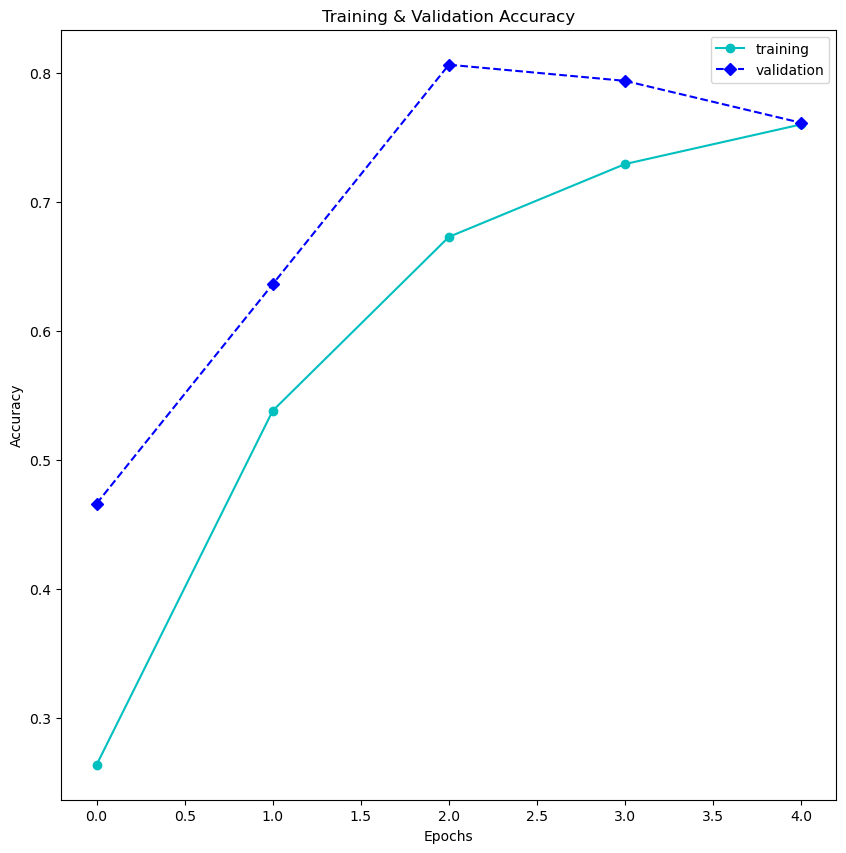

In [18]:
plt.figure(1, figsize=(10, 10))
plt.plot(range(len(history.history['accuracy'])),
         history.history['accuracy'],
         'co-',
         label='training')
plt.plot(
    range(len(history.history['val_accuracy'])),
    history.history['val_accuracy'],
    'bD--',
    label='validation'
)
plt.title('Training & Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

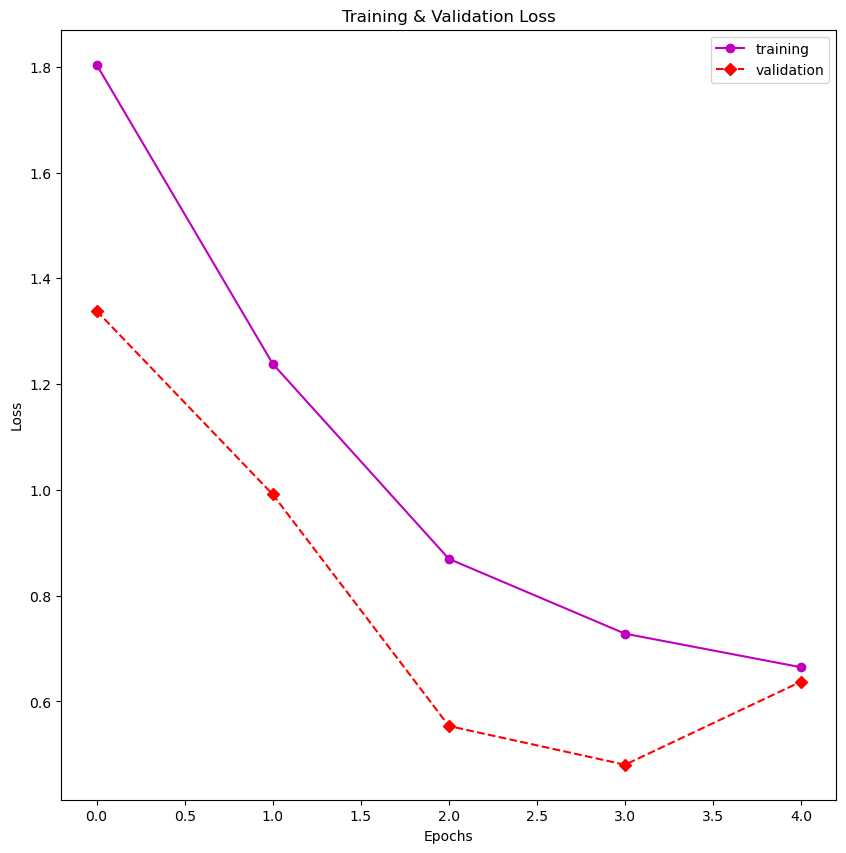

In [19]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(history.history['loss'])), 
         history.history['loss'],
         'mo-',
         label='training')
plt.plot(range(len(history.history['val_loss'])), 
         history.history['val_loss'],
         'rD--',
         label='validation')
plt.title('Training & Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

1/1 [==============================] - 0s 20ms/step
C:/Users/ASUS/Downloads/archive (2)/fixDataset/test/Healthy/20211231_162354 (Custom).jpg
Healthy


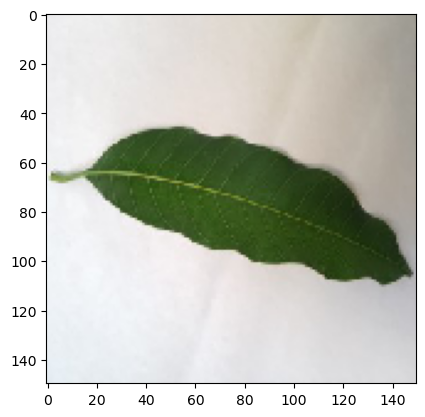

In [22]:
import tkinter as tk
from tkinter import filedialog
from keras.preprocessing import image
import numpy as np

root = tk.Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
filename = filedialog.askopenfilename()
%gui tk

img = tf.keras.utils.load_img(filename, target_size=(150, 150))
imgplot = plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=32)

print(filename)
if classes[0][0] == 1:
  print('Anthracnose')
elif classes[0][1] == 1:
  print('Bacterial Canker')
elif classes[0][2] == 1:
  print('Cutting Weevil')
elif classes[0][3] == 1:
  print('Die Back')
elif classes[0][4] == 1:
  print('Gall Midge')
elif classes[0][5] == 1:
  print('Healthy')
elif classes[0][6] == 1:
  print('Powdery Mildew')
else:
  print('Sooty Mould')